The data used in this notebook is taken from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets under a Creative Commons License. The datasets have been cleaned up by Petra Isenberg, Pierre Dragicevic, and Yvonne Jansen.



## Goal: Quantify the relationship between the weight and horsepower of a car. 

First, let's plot our data:

<AxesSubplot:xlabel='Weight', ylabel='Horsepower'>

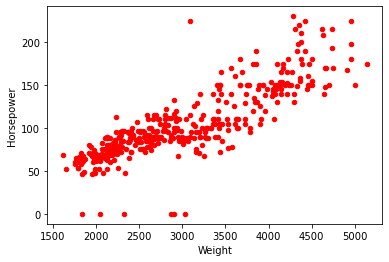

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
from sklearn import linear_model
%matplotlib inline

cars = pandas.read_csv('https://perso.telecom-paristech.fr/eagan/class/igr204/data/cars.csv', sep=';')
cars = cars.drop(labels=0, axis=0)

cars[['Weight', 'Horsepower']] = cars[['Weight', 'Horsepower']].astype(float)
#this converts the weight and hp data from strings to floats
#now we can do our data visualization

type(cars['Weight'][4])
cars[['Weight', 'Horsepower']].plot(x='Weight', y='Horsepower', kind='scatter', color='red')


Notice how our data contains outliers. At the bottom, we have a group of cars with no horsepower, which makes no sense. We also have a car that weighs just over 3000 lbs but somehow pulls in over 200 HP. 
Let's find which cars are producing these strange results:

In [2]:
power_car = cars[(cars['Horsepower']>=200) & (cars['Weight']<3500)]
no_hp_cars = cars[cars['Horsepower']==0]

outliers = pandas.concat([power_car, no_hp_cars])
outliers[['Car', 'Weight', 'Horsepower', 'Origin']]

,Car,Weight,Horsepower,Origin
20,Buick Estate Wagon (sw),3086.0,225.0,US
39,Ford Pinto,2046.0,0.0,US
134,Ford Maverick,2875.0,0.0,US
338,Renault Lecar Deluxe,1835.0,0.0,Europe
344,Ford Mustang Cobra,2905.0,0.0,US
362,Renault 18i,2320.0,0.0,Europe
383,AMC Concord DL,3035.0,0.0,US



Now that we've found our outliers, let's remove them from the data set of cars.


In [3]:
for row in outliers.index:
    cars = cars.drop(labels=row)

Let's confirm that we actually dropped the outliers from the data set by plotting the weight and HP values again:


<AxesSubplot:xlabel='Weight', ylabel='Horsepower'>

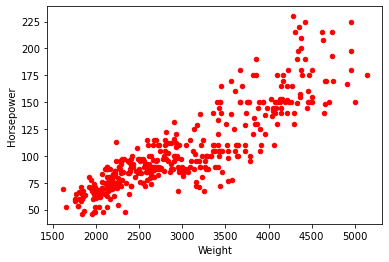

In [4]:
cars[['Weight', 'Horsepower']].plot( x='Weight', y='Horsepower', kind='scatter', color='red')

That looks a lot better. Now let's find the line of best fit for the data. The relationship between weight and horsepower appears to be linear, so we'll perform a linear regression using SciKit Learn:

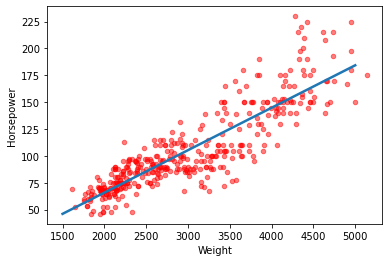

In [5]:
reg = linear_model.LinearRegression()
reg.fit(cars[['Weight']], cars['Horsepower'])

cars[['Weight', 'Horsepower']].plot( x='Weight', y='Horsepower', kind='scatter', color='red', alpha = 0.5)

x= numpy.linspace(1500,5000,100)
plt.plot(x, reg.intercept_ + reg.coef_*x, linewidth = 2.5)
plt.show()

It appears our line of best fit models our data pretty well. The equation for this line of best fit is given by:

In [6]:
print("Horsepower =", round(reg.intercept_,3), "+", round(reg.coef_[0],4), "* Weight(lbs)")

Horsepower = -13.211 + 0.0395 * Weight(lbs)



Using this equation, we can predict how much horsepower a car can produce given its weight.
